# 2. Perform image processing
<font size="4"> In this step, we perform image processing, which is a process of matching multiband imaging data in both spatial resolution (i.e., PSF size) and sampling (i.e., pixel size). Basically, this process includes PSF matching and spatial resampling and reprojection to the images. In this demo, we will perform image processing using `piXedfit.piXedfit_images.images_processing` class. </font>

In [1]:
import numpy as np
from astropy.io import fits
import os, sys
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

global PIXEDFIT_HOME
PIXEDFIT_HOME = os.environ['PIXEDFIT_HOME']
sys.path.insert(0, PIXEDFIT_HOME)

%matplotlib inline

In [2]:
# call images_processing class
from piXedfit.piXedfit_images import images_processing

## 2.1. Preparing inputs

In [3]:
# list the filters
filters = ['galex_fuv', 'galex_nuv', 'sdss_u', 'sdss_g', 'sdss_r', 'sdss_i', 
           'sdss_z', '2mass_j', '2mass_h', '2mass_k', 'wise_w1', 'wise_w2']

# input science images
sci_img = {}
sci_img['galex_fuv'] = 'GI1_009100_NGC0309-fd-intbgsub.fits'
sci_img['galex_nuv'] = 'GI1_009100_NGC0309-nd-intbgsub.fits'
sci_img['sdss_u'] = 'frame-u-001740-3-0115.fits'
sci_img['sdss_g'] = 'frame-g-001740-3-0115.fits'
sci_img['sdss_r'] = 'frame-r-001740-3-0115.fits'
sci_img['sdss_i'] = 'frame-i-001740-3-0115.fits'
sci_img['sdss_z'] = 'frame-z-001740-3-0115.fits'
sci_img['2mass_j'] = 'skybgsub_aJ_asky_001022s0620186.fits'
sci_img['2mass_h'] = 'skybgsub_aH_asky_001022s0620186.fits'
sci_img['2mass_k'] = 'skybgsub_aK_asky_001022s0620186.fits'
sci_img['wise_w1'] = 'skybgsub_0138m107_ac51-w1-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits'
sci_img['wise_w2'] = 'skybgsub_0138m107_ac51-w2-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits'

# input Variance images
var_img = {}
var_img['galex_fuv'] = 'var_GI1_009100_NGC0309-fd-intbgsub.fits'
var_img['galex_nuv'] = 'var_GI1_009100_NGC0309-nd-intbgsub.fits'
var_img['sdss_u'] = 'var_frame-u-001740-3-0115.fits'
var_img['sdss_g'] = 'var_frame-g-001740-3-0115.fits'
var_img['sdss_r'] = 'var_frame-r-001740-3-0115.fits'
var_img['sdss_i'] = 'var_frame-i-001740-3-0115.fits'
var_img['sdss_z'] = 'var_frame-z-001740-3-0115.fits'
var_img['2mass_j'] = 'var_skybgsub_aJ_asky_001022s0620186.fits'
var_img['2mass_h'] = 'var_skybgsub_aH_asky_001022s0620186.fits'
var_img['2mass_k'] = 'var_skybgsub_aK_asky_001022s0620186.fits'
var_img['wise_w1'] = 'var_0138m107_ac51-w1-unc-3_ra14.177751925_dec-9.913864294_asec1000.000.fits'
var_img['wise_w2'] = 'var_0138m107_ac51-w2-unc-3_ra14.177751925_dec-9.913864294_asec1000.000.fits'

gal_ra = 14.177751925               
gal_dec = -9.913864294
gal_z = 0.0188977

# size of the final stamp images
stamp_size = [131,131]

## 2.2. Call images_processing class

In [4]:
img_process = images_processing(filters=filters,sci_img=sci_img,var_img=var_img,gal_ra=gal_ra,gal_dec=gal_dec,
                                gal_z=gal_z,stamp_size=stamp_size)

<font size="4"> __Run image processing__ </font>

In [5]:
output_stamps = img_process.reduced_stamps()

[PSF matching to wise_w2]
[produce crop_GI1_009100_NGC0309-fd-intbgsub.fits]
[produce crop_var_GI1_009100_NGC0309-fd-intbgsub.fits]
[PSF matching]
[produce psfmatch_crop_GI1_009100_NGC0309-fd-intbgsub.fits]
[produce psfmatch_crop_var_GI1_009100_NGC0309-fd-intbgsub.fits]
[produce crop_GI1_009100_NGC0309-nd-intbgsub.fits]
[produce crop_var_GI1_009100_NGC0309-nd-intbgsub.fits]
[PSF matching]
[produce psfmatch_crop_GI1_009100_NGC0309-nd-intbgsub.fits]
[produce psfmatch_crop_var_GI1_009100_NGC0309-nd-intbgsub.fits]
[produce crop_frame-u-001740-3-0115.fits]
[produce crop_var_frame-u-001740-3-0115.fits]
[PSF matching]
[produce psfmatch_crop_frame-u-001740-3-0115.fits]
[produce psfmatch_crop_var_frame-u-001740-3-0115.fits]
[produce crop_frame-g-001740-3-0115.fits]
[produce crop_var_frame-g-001740-3-0115.fits]
[PSF matching]
[produce psfmatch_crop_frame-g-001740-3-0115.fits]
[produce psfmatch_crop_var_frame-g-001740-3-0115.fits]
[produce crop_frame-r-001740-3-0115.fits]
[produce crop_var_frame-

<font size="4"> Check results of images processing: stamps of reduced images. </font>

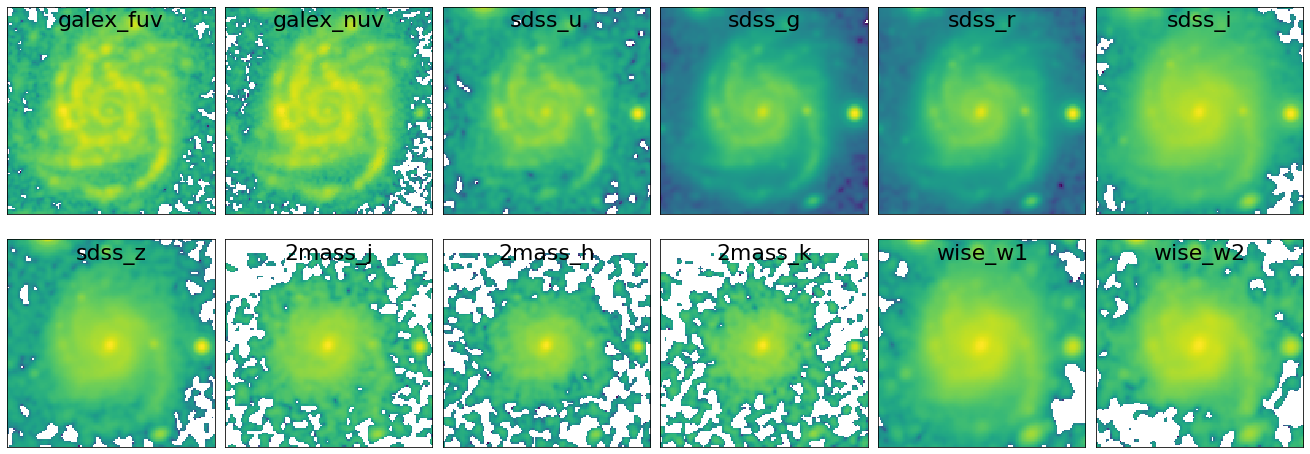

In [6]:
%matplotlib inline

fig1 = plt.figure(figsize=(20,7))

nbands = len(filters)
for bb in range(0,nbands):
    f1 = fig1.add_subplot(2, 6, bb+1)
    plt.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
    str_temp = "name_img_%s" % filters[bb]
    hdu = fits.open(output_stamps[str_temp])
    plt.imshow(np.log10(hdu[0].data), origin='lower')
    f1.text(0.5, 0.93, filters[bb], horizontalalignment='center', 
            verticalalignment='center',transform = f1.transAxes, 
            fontsize=22, color='black')
    hdu.close()

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.05, wspace=0.05)

## 2.3. Define galaxy's region of interest
<font size="4"> Basically, the user has a freedom to define the galaxy's region of interest (ROI) that will be analyzed further (e.g., SED fitting). The input ROI should be in a 2D array with the same size as that of the stamp images produced after the image processing. In the 2D array, pixels belong to the galaxy should be given value 1 and 0 otherwise.

Although the ROI can be freely defined, __piXedfit__ provides two options to assist on this: (1) using segmentation maps, and (2) using elliptical aperture. In this demo, we will try these two options, but at the end we will use the ROI defined based on segmentation maps.</font>

### 2.3.1. Based on segmentation maps

<font size="4"> This can be done using `segmentation_sep` function. </font>

In [7]:
segm_maps = img_process.segmentation_sep(output_stamps, thresh=2.8, minarea=100, deblend_nthresh=40, 
                                         deblend_cont=0.005)

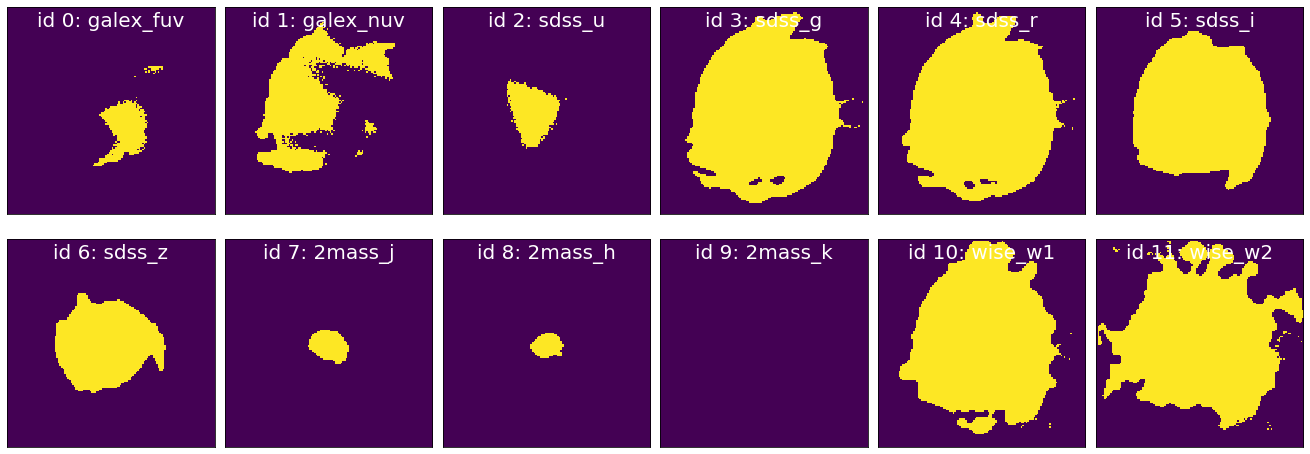

In [8]:
fig1 = plt.figure(figsize=(20,7))

for bb in range(0,nbands):
    f1 = fig1.add_subplot(2, 6, bb+1)
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)
    plt.imshow(segm_maps[bb], origin='lower')
    f1.text(0.5, 0.93, "id %d: %s" % (bb,filters[bb]), horizontalalignment='center', 
            verticalalignment='center',transform = f1.transAxes, 
            fontsize=20, color='white')

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.05, wspace=0.05)

<font size="4"> Select segmentation maps and merge them to form a galaxy region. Let's name it `gal_region1`. This can be done using `galaxy_region` method. </font>

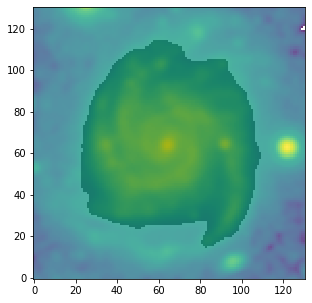

In [9]:
# select segmentation maps
select_ids = [5, 6]
select_segm_maps = []
for ii in select_ids:
    select_segm_maps.append(segm_maps[ii])

gal_region1 = img_process.galaxy_region(segm_maps=select_segm_maps)

# plot
fig1 = plt.figure(figsize=(5,5))
f1 = plt.subplot()

str_temp = "name_img_%s" % filters[3]
hdu = fits.open(output_stamps[str_temp])
data_image = hdu[0].data
hdu.close()
plt.imshow(np.log10(data_image), origin='lower')
    
plt.imshow(gal_region1, origin='lower', cmap='Greys', alpha=0.2)

### 2.3.2. Based on simple elliptical aperture

<font size="4"> This can also be performed using `galaxy_region`. Let's assume a circular aperture (ellipticity=0) and call the region defined with this method as `gal_region2`.</font>

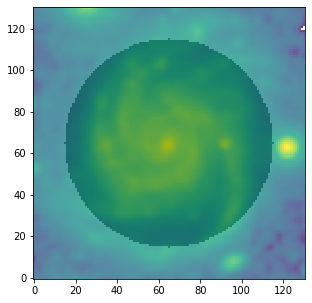

In [10]:
# ellipse center
y_cent = (stamp_size[0]-1)/2
x_cent = (stamp_size[1]-1)/2 

# ellipticity and position angle. Let's assume circular and choose arbitrary position angle.
ell = 0.0  
pa = 45.0

# radius
radius_sma = 50.0 

gal_region2 = img_process.galaxy_region(use_ellipse=True, x_cent=x_cent, y_cent=y_cent, 
                                        ell=ell, pa=pa, radius_sma=radius_sma) 

# plot
fig1 = plt.figure(figsize=(5,5))
f1 = plt.subplot()
str_temp = "name_img_%s" % filters[3]
hdu = fits.open(output_stamps[str_temp])
data_image = hdu[0].data
hdu.close()
plt.imshow(np.log10(data_image), origin='lower')
    
plt.imshow(gal_region2, origin='lower', cmap='Greys', alpha=0.2)

## 2.4. Calculate E(B-V) attenuation by the foreground Galactic dust 
<font size="4"> This value can be estimated using the `EBV_foreground_dust` function. </font>   

In [11]:
from piXedfit.piXedfit_images import EBV_foreground_dust

Gal_EBV = EBV_foreground_dust(gal_ra, gal_dec)
print (Gal_EBV)

0.03370103765151496


## 2.5. Calculate fluxes of pixels and get photometric data cube
<font size="4"> This can be done using the `flux map` method. We need to input galaxy's ROI to this function. For this tutorial, let's use the one we obtained based on the segmentation maps.

In [12]:
name_out_fits = "fluxmap_ngc309.fits"
flux_maps = img_process.flux_map(output_stamps, gal_region1, Gal_EBV=Gal_EBV,
                                 name_out_fits=name_out_fits)

## 2.6. Check result of image processing: photometric data cube

In [13]:
hdu = fits.open("fluxmap_ngc309.fits")
hdu.info()
header = hdu[0].header
print (header)

# get unit of flux in erg/s/cm2/A
unit_flux = float(header['unit'])

# get maps
gal_region = hdu['GALAXY_REGION'].data
flux_map = hdu['FLUX'].data*unit_flux
flux_err_map = hdu['FLUX_ERR'].data*unit_flux
hdu.close()

Filename: fluxmap_ngc309.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  FLUX          1 PrimaryHDU      33   (131, 131, 12)   float64   
  1  FLUX_ERR      1 ImageHDU         9   (131, 131, 12)   float64   
  2  GALAXY_REGION    1 ImageHDU         8   (131, 131)   float64   
  3  STAMP_IMAGE    1 ImageHDU       107   (131, 131)   float64   
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                  131                                                  NAXIS2  =                  131                                                  NAXIS3  =                   12                                                  EXTEND  =                    T                                                  NFILTERS=                   12                                          

<font size="4"> Get central wavelengths of the filters to be used for plotting SEDs of pixels. This can be obtained using `piXedfit.utils.filtering.cwave_filters` function. </font>

In [14]:
from piXedfit.utils.filtering import cwave_filters

photo_wave = cwave_filters(filters)

### 2.6.1. Plot maps of fluxes, flux uncertainties, and S/N

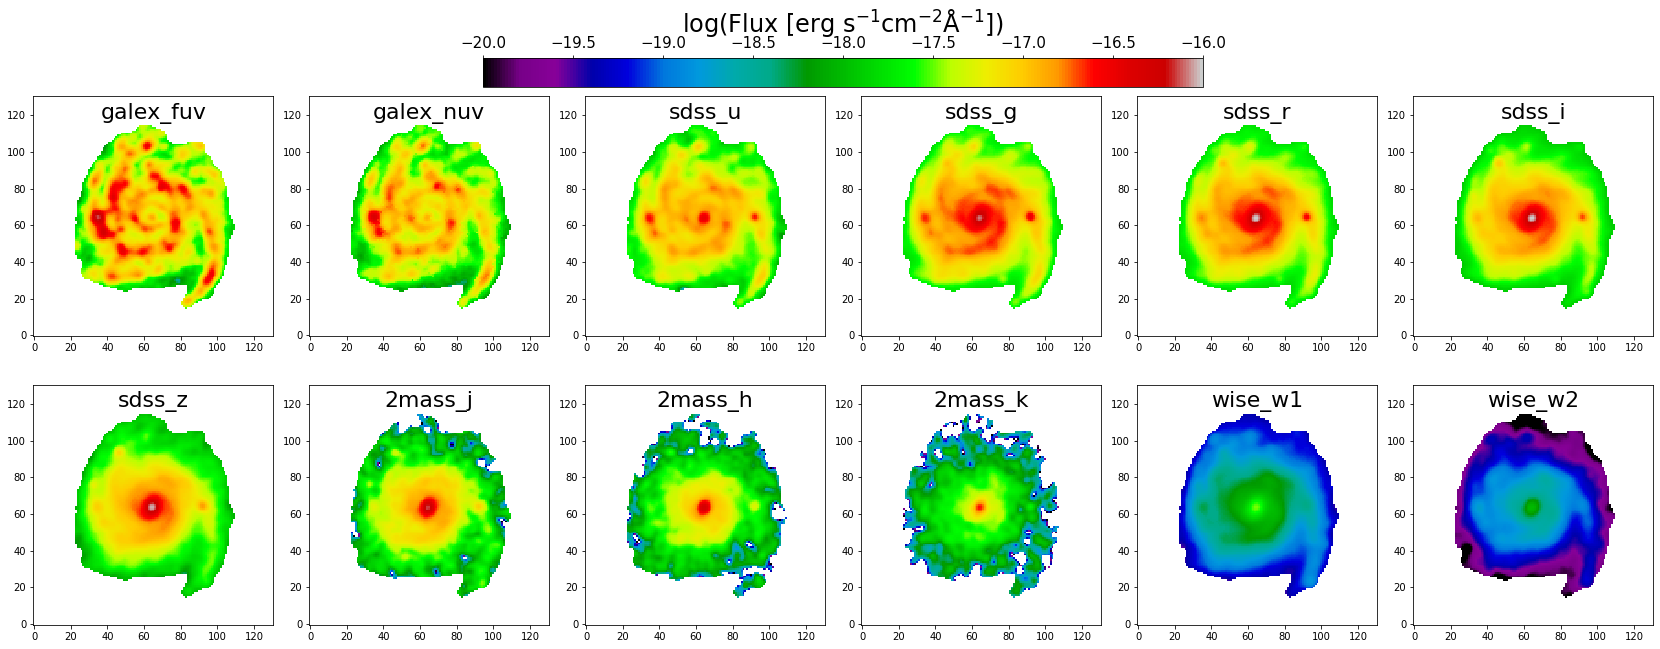

In [15]:
# number of filters:
nbands = len(filters)

# plotting
fig1 = plt.figure(figsize=(25,10))
for ii in range(0,nbands):
    f1 = fig1.add_subplot(2, 6, ii+1)
    im = plt.imshow(np.log10(flux_map[ii]), origin='lower', cmap='nipy_spectral', vmin=-20, vmax=-16.0)
    f1.text(0.5, 0.93, '%s' % filters[ii], horizontalalignment='center', verticalalignment='center',
            transform = f1.transAxes, fontsize=22, color='black')
    
cax = fig1.add_axes([0.3, 0.83, 0.4, 0.04])
cb = fig1.colorbar(im, cax=cax, orientation="horizontal")
cb.ax.tick_params(labelsize=14)
cax.xaxis.set_ticks_position("top")
cax.xaxis.set_label_position("top")
cb.set_label(r'log(Flux [erg $\rm{ s}^{-1}\rm{cm}^{-2}\AA^{-1}$])', fontsize=24)
cb.ax.tick_params(labelsize=15)

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.85, hspace=0.005, wspace=0.15)
plt.show()

### 2.6.2. Check SEDs of some pixels

In [16]:
## transpose from (band,y,x) => (y,x,band):
pix_SED_flux = np.transpose(flux_map, axes=(1,2,0))
pix_SED_flux_err = np.transpose(flux_err_map, axes=(1,2,0))

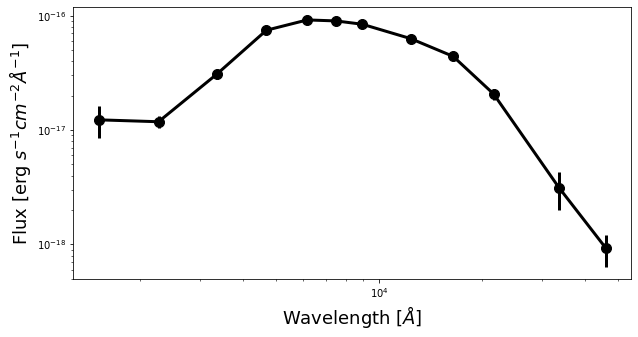

In [17]:
fig1 = plt.figure(figsize=(10,5))
f1 = plt.subplot()
f1.set_yscale('log')
f1.set_xscale('log')
plt.xlabel(r"Wavelength [$\AA$]", fontsize=18)
plt.ylabel(r"Flux [erg $s^{-1}cm^{-2}\AA^{-1}$]", fontsize=18)

# pixel's coordinate
pos_y = 65
pos_x = 65

plt.errorbar(photo_wave, pix_SED_flux[pos_y][pos_x], yerr=pix_SED_flux_err[pos_y][pos_x], 
                 fmt='-o', markersize=10, lw=3, color='black')
plt.show()

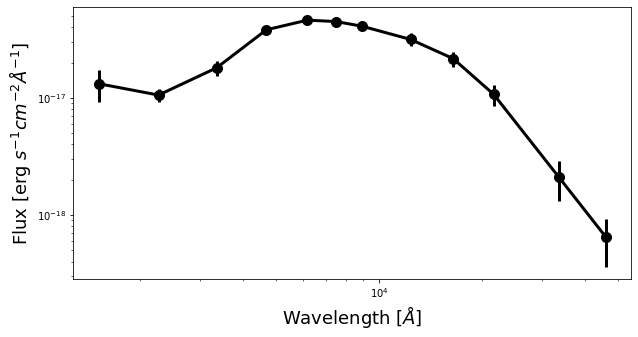

In [18]:
fig1 = plt.figure(figsize=(10,5))
f1 = plt.subplot()
f1.set_yscale('log')
f1.set_xscale('log')
plt.xlabel(r"Wavelength [$\AA$]", fontsize=18)
plt.ylabel(r"Flux [erg $s^{-1}cm^{-2}\AA^{-1}$]", fontsize=18)

# pixel's coordinate
pos_y = 60
pos_x = 63

plt.errorbar(photo_wave, pix_SED_flux[pos_y][pos_x], yerr=pix_SED_flux_err[pos_y][pos_x], 
                 fmt='-o', markersize=10, lw=3, color='black')
plt.show()

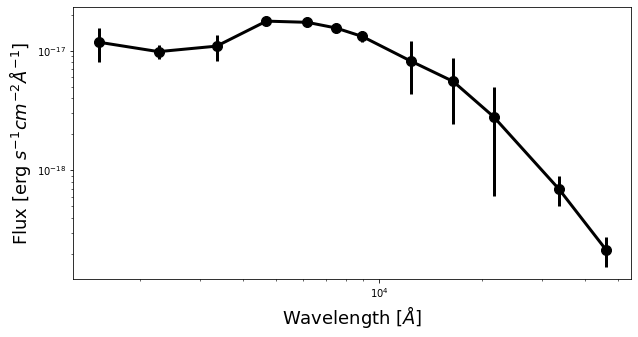

In [19]:
fig1 = plt.figure(figsize=(10,5))
f1 = plt.subplot()
f1.set_yscale('log')
f1.set_xscale('log')
plt.xlabel(r"Wavelength [$\AA$]", fontsize=18)
plt.ylabel(r"Flux [erg $s^{-1}cm^{-2}\AA^{-1}$]", fontsize=18)

# pixel's coordinate
pos_y = 50
pos_x = 63

plt.errorbar(photo_wave, pix_SED_flux[pos_y][pos_x], yerr=pix_SED_flux_err[pos_y][pos_x], 
                 fmt='-o', markersize=10, lw=3, color='black')
plt.show()

<font size="4"> Plot SEDs of a collection of pixels.

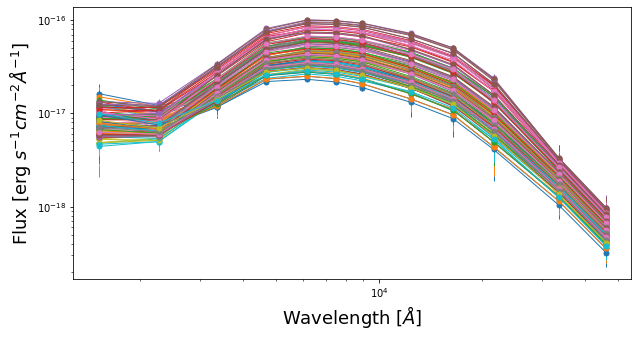

In [20]:
fig1 = plt.figure(figsize=(10,5))
f1 = plt.subplot()

f1.set_yscale('log')
f1.set_xscale('log')
plt.xlabel(r"Wavelength [$\AA$]", fontsize=18)
plt.ylabel(r"Flux [erg $s^{-1}cm^{-2}\AA^{-1}$]", fontsize=18)

for yy in range(60,70):
    for xx in range(60,70):
        pos_y = yy
        pos_x = xx
        plt.errorbar(photo_wave, pix_SED_flux[pos_y][pos_x], yerr=pix_SED_flux_err[pos_y][pos_x], 
                         fmt='-o', markersize=5, lw=1)

plt.show()